In [40]:

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Loading the data

In [41]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
# Reshape the data for use in a convolutional neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Creating the model

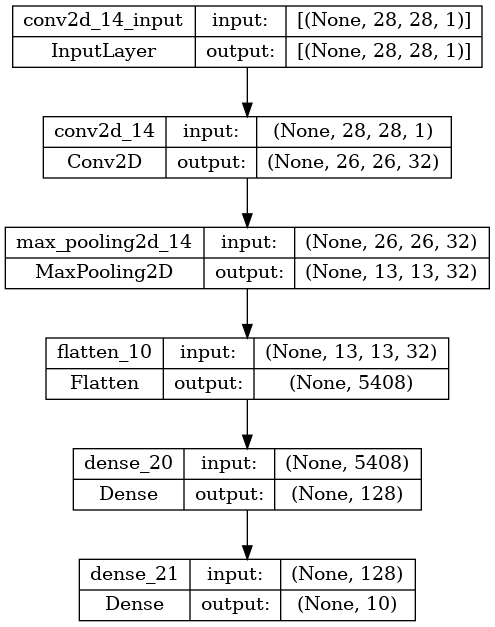

In [42]:
# We build the model using convolutional layers followed by max pooling layers
# Max pooling layers are used to down sample the feature maps summarizing the most actived presence of a feature
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# We use softmax as the activation to represent the confidence (0-1)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Training the model

In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1637 - accuracy: 0.9501 - val_loss: 0.0756 - val_accuracy: 0.9775
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0651 - val_accuracy: 0.9804
Epoch 3/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0605 - val_accuracy: 0.9826
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0748 - val_accuracy: 0.9793
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0543 - val_accuracy: 0.9872
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0601 -

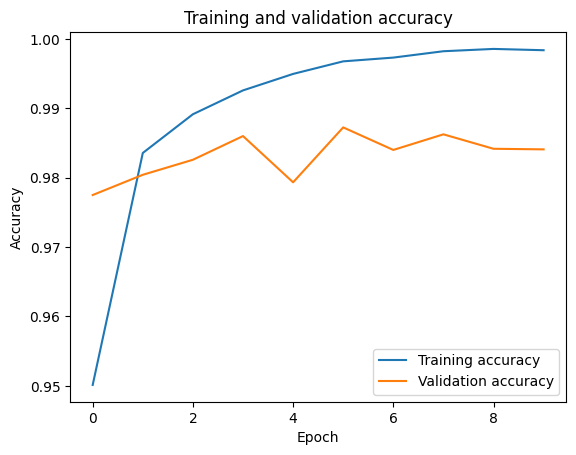

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9809    0.9980    0.9894       980
           1     0.9956    0.9885    0.9920      1135
           2     0.9855    0.9855    0.9855      1032
           3     0.9464    0.9970    0.9711      1010
           4     0.9969    0.9827    0.9897       982
           5     0.9954    0.9753    0.9853       892
           6     0.9895    0.9802    0.9848       958
           7     0.9931    0.9786    0.9858      1028
           8     0.9855    0.9743    0.9799       974
           9     0.9822    0.9861    0.9842      1009

    accuracy                         0.9848     10000
   macro avg     0.9851    0.9846    0.9848     10000
weighted avg     0.9851    0.9848    0.9848     10000



In [44]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Enlarging the convolution window

In [45]:
# Build the model with a larger convolution window
model = keras.Sequential([
    keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1832 - accuracy: 0.9447 - val_loss: 0.0647 - val_accuracy: 0.9808
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0603 - val_accuracy: 0.9817
Epoch 3/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0485 - val_accuracy: 0.9853
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.0444 - val_accuracy: 0.9868
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0250 - accuracy: 0.9911 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0431 - v

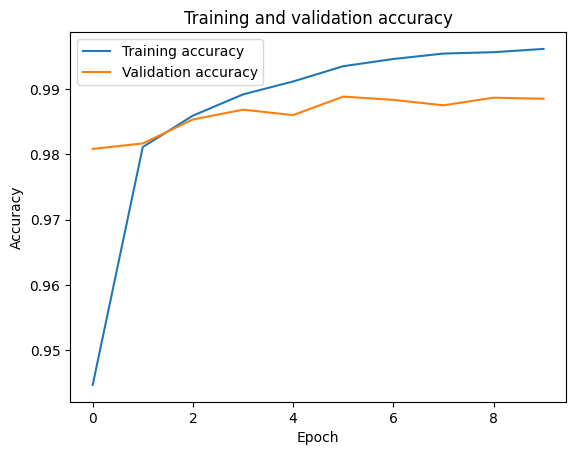

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9919    0.9959    0.9939       980
           1     0.9947    0.9965    0.9956      1135
           2     0.9922    0.9893    0.9908      1032
           3     0.9920    0.9881    0.9901      1010
           4     0.9928    0.9898    0.9913       982
           5     0.9877    0.9922    0.9899       892
           6     0.9968    0.9896    0.9932       958
           7     0.9845    0.9883    0.9864      1028
           8     0.9857    0.9908    0.9882       974
           9     0.9861    0.9841    0.9851      1009

    accuracy                         0.9905     10000
   macro avg     0.9905    0.9905    0.9905     10000
weighted avg     0.9905    0.9905    0.9905     10000



In [46]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Enlarging the stride

In [47]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2739 - accuracy: 0.9176 - val_loss: 0.1108 - val_accuracy: 0.9658
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1014 - accuracy: 0.9689 - val_loss: 0.0699 - val_accuracy: 0.9792
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0733 - accuracy: 0.9780 - val_loss: 0.0557 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0546 - val_accuracy:

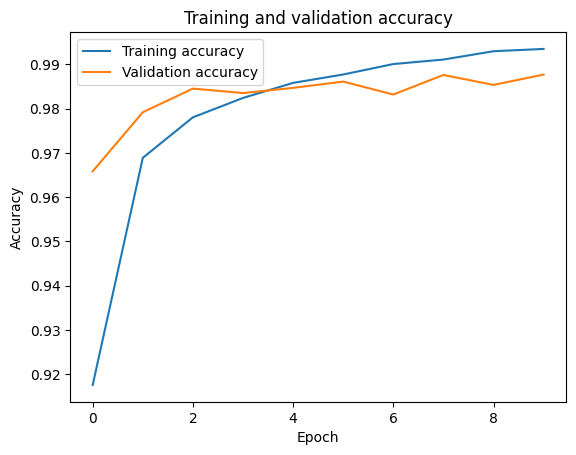

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9868    0.9908    0.9888       980
           1     0.9921    0.9956    0.9938      1135
           2     0.9912    0.9806    0.9859      1032
           3     0.9795    0.9950    0.9872      1010
           4     0.9888    0.9868    0.9878       982
           5     0.9800    0.9910    0.9855       892
           6     0.9823    0.9864    0.9844       958
           7     0.9826    0.9903    0.9864      1028
           8     0.9947    0.9723    0.9834       974
           9     0.9870    0.9762    0.9816      1009

    accuracy                         0.9866     10000
   macro avg     0.9865    0.9865    0.9865     10000
weighted avg     0.9866    0.9866    0.9866     10000



In [48]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Higher dropout rate

In [49]:
# Build the model with a higher dropout rate
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)



Epoch 1/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2795 - accuracy: 0.9162 - val_loss: 0.0762 - val_accuracy: 0.9782
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1141 - accuracy: 0.9649 - val_loss: 0.0639 - val_accuracy: 0.9813
Epoch 3/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0864 - accuracy: 0.9742 - val_loss: 0.0579 - val_accuracy: 0.9816
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0698 - accuracy: 0.9782 - val_loss: 0.0528 - val_accuracy: 0.9841
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0628 - accuracy: 0.9795 - val_loss: 0.0556 - val_accuracy: 0.9840
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.0472 - val_accuracy: 0.9858
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0480 -

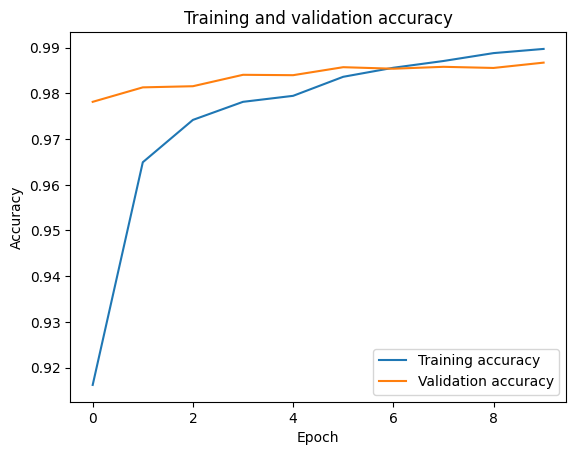

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9858    0.9929    0.9893       980
           1     0.9921    0.9965    0.9943      1135
           2     0.9932    0.9855    0.9893      1032
           3     0.9824    0.9950    0.9887      1010
           4     0.9780    0.9980    0.9879       982
           5     0.9887    0.9832    0.9859       892
           6     0.9937    0.9833    0.9885       958
           7     0.9893    0.9922    0.9908      1028
           8     0.9896    0.9764    0.9829       974
           9     0.9910    0.9792    0.9850      1009

    accuracy                         0.9884     10000
   macro avg     0.9884    0.9882    0.9883     10000
weighted avg     0.9884    0.9884    0.9884     10000



In [50]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))